In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [57]:
data = pd.read_csv('data.csv')

In [58]:
data

,MAKE MODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0
...,...,...,...,...,...,...
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0


In [59]:
x = data['HP'].values
y = data['MPG'].values
beta = np.polyfit(x, y, 1)
beta

array([-0.13902326, 50.06607807])

In [60]:
np.corrcoef(x, y)[0,1]

-0.7898563519251426

In [61]:
np.sum((y - beta[0]*x - beta[1])**2)

3049.4351111695155

Text(0, 0.5, 'Miles Per Gallon')

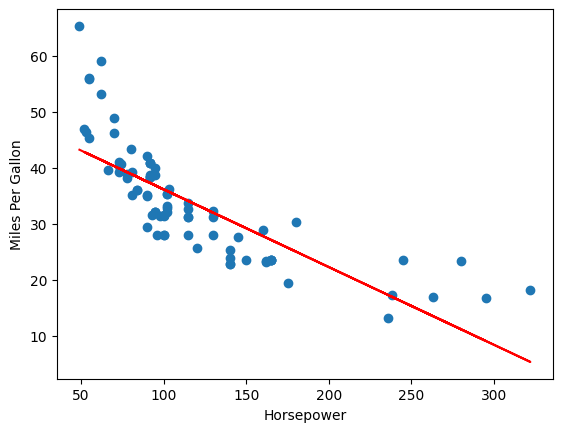

In [62]:
# plot
plt.scatter(x, y)
plt.plot(x, beta[0]*x + beta[1], color='red')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')


In [63]:
x = data['HP'].values
y = np.log(data['MPG'].values)
beta = np.polyfit(x, y, 1)
beta

array([-0.0045889,  4.0132294])

In [64]:
np.corrcoef(x, y)[0,1]

-0.8569740518396142

Text(0, 0.5, 'log(Miles Per Gallon)')

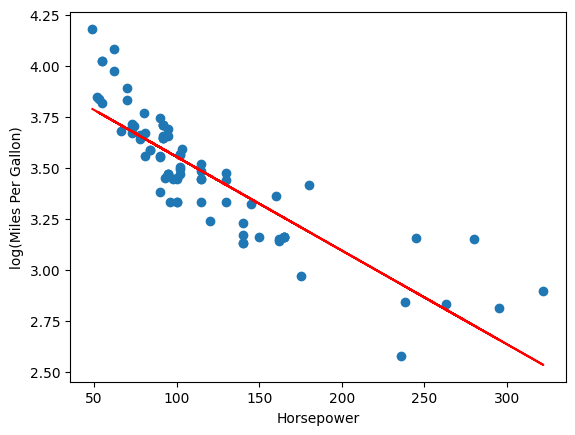

In [65]:
# plot
plt.scatter(x, y)
plt.plot(x, beta[0]*x + beta[1], color='red')
plt.xlabel('Horsepower')
plt.ylabel('log(Miles Per Gallon)')


In [66]:
X = data[['VOL', 'HP', 'SP', 'WT']].values
X = np.column_stack([np.ones(X.shape[0]), X])
y = data['MPG'].values
beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [68]:
((y - X @ beta)**2).sum()

1027.3814772548606

Text(0, 0.5, 'Predicted MPG')

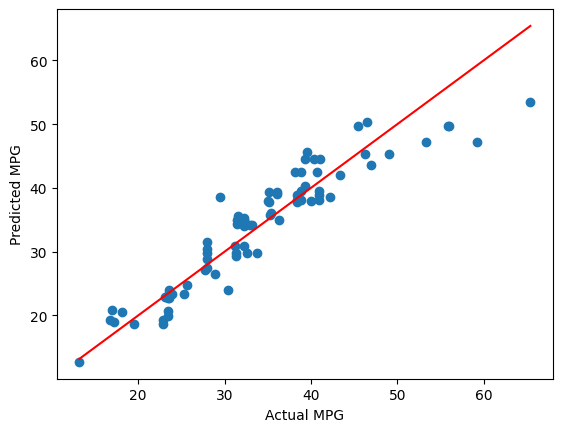

In [71]:
plt.scatter(y, X @ beta)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='red')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
